# Lecture 7: Feature Engineering & Representation Learning

- What features do we consider to improve accuracy, and compromise the memory at the same time?
- One frame's signal's features can never be enough for whatever task, whether speaker recognition, speech recognition or whatever other tasks.

- At first, we were using GMMs to represent a person's speech, we were clustering hand-crafted feature vectors such as cepstral features, linear prediction coefficients using k-Means & GMMs. We were typically using the parameters of the GMMs (or k-Means) as representations.

- At first, since GMMs were generative, and they could efficiently model conetxt-dependant phone units, we were using other ML algorithms & models to produce the feature vector that will be fed into the GMMS. NNs & PCA became feature extractors, since they did decorrelate the data, to feed it into GMMS.
- Frame-level features, being fed into the NN, then performing statistics pooling over them (averaging them), they become rather a segment and not a frame, and then they are fed into GMMS. 

- Auto-encoders: we take an input, feed it through a MLP, then get the output and optimize, we would be encoding the principal components of the data (aka. performing PCA on the data) and we start capturing and modelling the distributions. We can learn features directly from speech.

- Linear prediction was predicting the spectrum without going through the Fourier transform. NN is just extending the same idea and making it non-linear. Linear prediction is just using a "filter" to get the output prediction without going through the Fourier transform.

- NNs are seen as filters, which we feed the inputs, and then get the output without manually extracting features. 

- People wanted to break free and totally avoid signal processing.

- Speech processing became for them, the indicator of the length of the signal fed as input to the NN (first layer input), the filter size (input size) has to be lower than one pitch period if we want to get a sub-segmental-based output. However, for a segmental-based output, we use a filter size of 1-3 pitch periods. Same goes for the window shift, we usually take a shift shorter than a pitch period.

- For a CNN, the window size along the layers is getting longer and longer, which basically means that we are looking at the signal at multiple resolutions. We are basically analysing in short windows, then maxpooling, this way we analyze an even longer duration window. So we are looking at the signal in different resolutions, from short windows to longer and longer windows.

- At the end of the day, every single problem can be reduced to a regression & a classification problem.

- CNNs, learn a representation, then feed them into a transformer. 
$\bf{Self-supervised\space Learning}$. We are learning the distributions of the data.

## What information do such systems learn?

1. Filter Analysis: First Convolution Layer (layer operation).
    We would think that convolution layers emphasize with the same intensty on all frequencies, but this isn't the case. It emphasizes more the task-dependant regions (eg. formants region for speech recognition, pitch frequency for speaker recognition). (This is the cumulative frequency response of all filters in the first convolution layer).

    Analogy to make sure and understand whether the network is really learning or not: between the 1st and 2nd convolution layers, we project the filters into sines & cosines bases, then we take the DFT of the filters, then we compute the output of input speech signal through the filters, we then get the spectral dictionary of the response of filters to input speech by interpreting learned filters collectively. The number of FFT points is the same as the signal length. And finally, we found that within the first two convolution layers, we are capturing the formants information (formants approach), automatically done, without going through autocorrelation and so on (For Speech Recognition). As for Speaker Recognition, the same approach was capturing the fundamental frequency information. Speech Recognition & Speaker Recognition respectfully.

    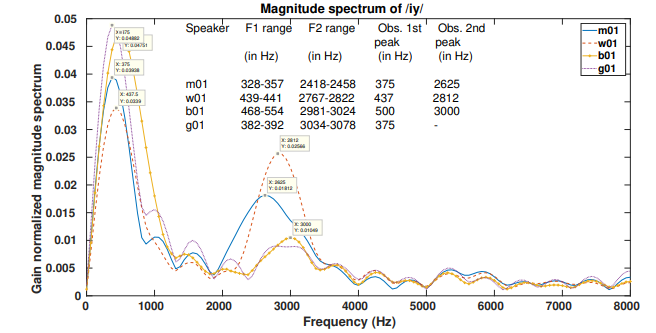

    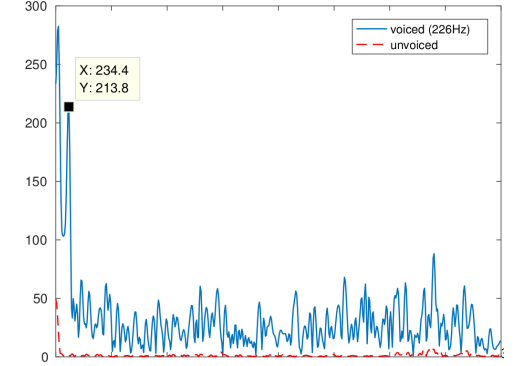

Now using these same CNNs for Speaker Recognition, we can easily detect when there is closure and opening (silence & unvoiced speech vs voiced speech).

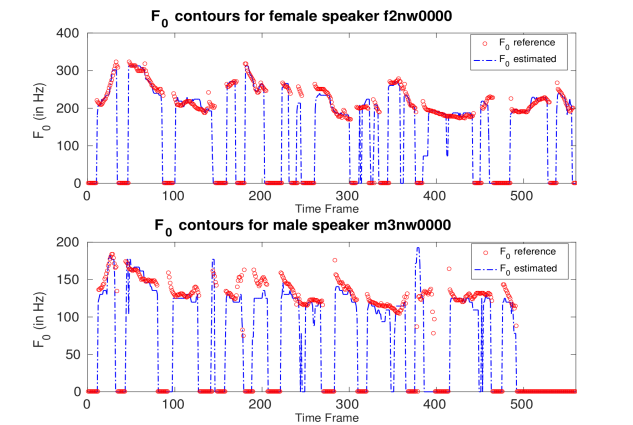

For females its performance is good, but for males it is slightly worse. The reason for that is that males have low pitch frequencies, so using the same window size will not cause the same performance, since we are looking usually to have a window where we can see several cycles (periods). 

2. Whole network level analysis: Now we can look at the entirety of the CNN and analyze it, and make sense of its filters learning. Here we use the same method as visualization in computer vision, where we are capturing the output of the neural network upon giving it different inputs (impulse response). We perform slight input perturbation and detect the perturbation/different in the output, or gradient-based methods, where we check what pixels have the most weight, and so on.

The problem with this method is the fact that it is left for human interpretation, there is no deterministic aspect in this method, audio (& relevance) signals are not visually interprettable, unlike for images. Since if we perform the same methods on speech wave signals, we will get wave signals, which in of itself is impossible to draw any meaningful deterministic conclusions. BUT, the interpretation can be done in the spectral domain, eg. we can take the autocorrelation of the input signal and the autocorrelation of the output signal from this visualization approach, and here we can start interpreting (shown theoretically). Both spectrums (consequently signals) have similar spectrum properties.

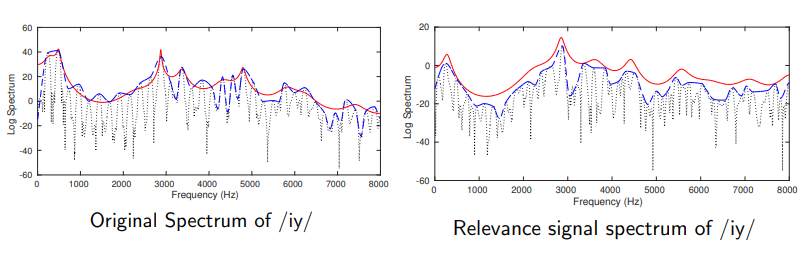

Using the CNN trained for Speech Recognition, applying this visualization method on it, we can clearly see (through the relevant signal spectrum) that the CNN also was capturing the fundamental frequency $F_{0}$, not just the formants, which we could not see before using the same CNN. 

Same goes for the CNN trained for Speaker Recognition, applying the visualization method, we can also see that it was capturing the formants information (still depends on the window size).

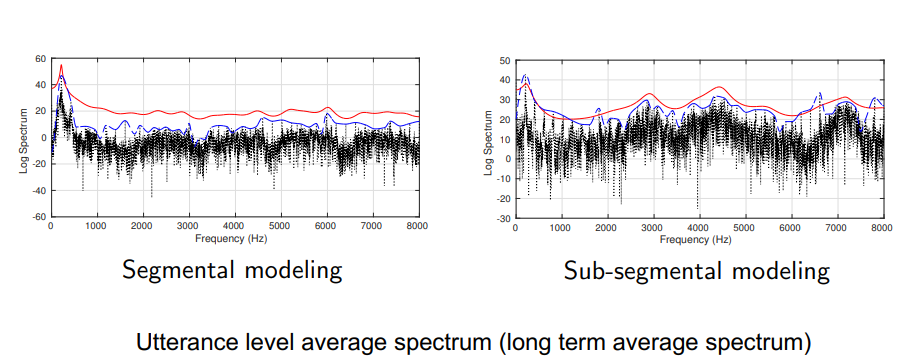


Now for a CNN trained for Speaker Recognition, it is true that the model focuses on the pitch information $F_{0}$ and does not give much weight to the first few (two) formants, but we found that it also focuses on the higher formants region, which were discovered to be speaker-related.

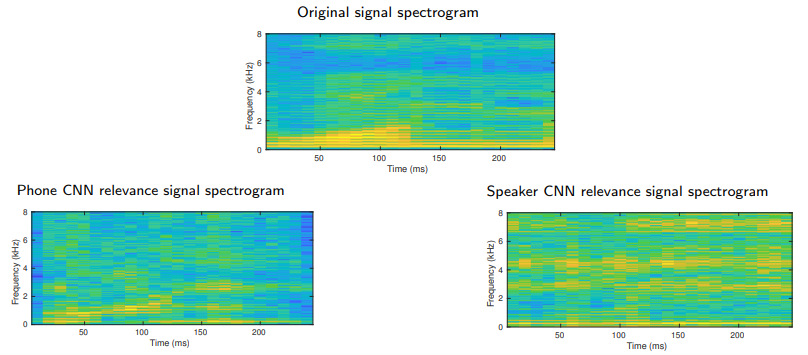


Now, we have models that gather all of these ideas together, foundation models implement the ideas of autoencoders, temporal context windowing, hierarchical information processing, reconstructing information by clustering latent representations or acoustic features, and predicting them, and they can contain different types of modelling, can view the data in different ways. 

Although foundation models work, we still have a lot of open questions. Why? Because we NEED to UNDERSTAND & EXPLAIN in detail how and why they work. IN DETAIL.

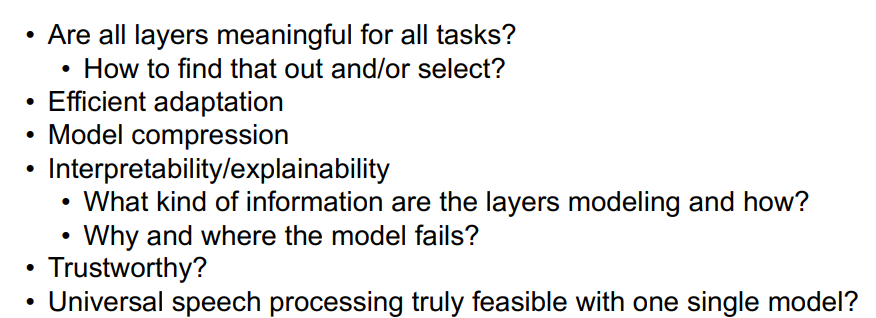

How to explain what layers do what? How to understand layers' functions?

Is the model we have parameter-efficient? Or can it be adapted more to be more efficient? How to prove it theoretically?

Model compression and its problems.

Explain why and where models fail, and how to avoid/solve it.

Are the models trustworthy? Can we really depend on one model to do all tasks? Even if so, can we get to a point where the models become deterministic?

Universal Speech Processing with one single model?